# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Importing/mounting data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Files/ExtraaLearn.csv')


## Data Overview

- Observations
- Sanity checks

In [ ]:
# Display the first 10 rows of the dataset
df.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


In [ ]:
# Get the number of rows and columns
no_rows, no_columns = df.shape

# Print out results
print(f"Rows: {no_rows}")
print(f"Columns: {no_columns}")

Rows: 4612
Columns: 15


The dataset has a total of 4612 rows and 15 columns

In [ ]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

The dataset has primarily 3 datatypes: Object, integer and float

In [ ]:
# Check for missing values
missing_values = df.isnull()
print(missing_values)

         ID    age  current_occupation  first_interaction  profile_completed  \
0     False  False               False              False              False   
1     False  False               False              False              False   
2     False  False               False              False              False   
3     False  False               False              False              False   
4     False  False               False              False              False   
...     ...    ...                 ...                ...                ...   
4607  False  False               False              False              False   
4608  False  False               False              False              False   
4609  False  False               False              False              False   
4610  False  False               False              False              False   
4611  False  False               False              False              False   

      website_visits  time_spent_on_web

The false output indicates no missing values, thus one does not need to do additional manipulation to deal with missing values

In [ ]:
# Check for duplicates
df.duplicated ()

0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool

The False output per row indicates no duplicated rows were found

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

*Performance of some data preprocessing checks (duplication and missing values) done in the sanity and observation section. The remaining ones will be done if needed in this section.*

In [ ]:
# Check data range for the status column
print(df['status'].min(), df['status'].max())


0 1


The only values available in the status column are 1 and 0. Only makes sense to convert it into a categorical column.

In [ ]:
# Treat the status column as a categorical column
df['status'] = df['status'].astype(str)

In [ ]:
# Check outliers in numerical columns
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit
count,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126
std,13.161454,2.829134,743.828683,1.968125
min,18.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750
50%,51.000000,3.000000,376.000000,2.792000
75%,57.000000,5.000000,1336.750000,3.756250
max,63.000000,30.000000,2537.000000,18.434000


Descriptive Statistics for Age:
count    4612.000000
mean       46.201214
std        13.161454
min        18.000000
25%        36.000000
50%        51.000000
75%        57.000000
max        63.000000
Name: age, dtype: float64


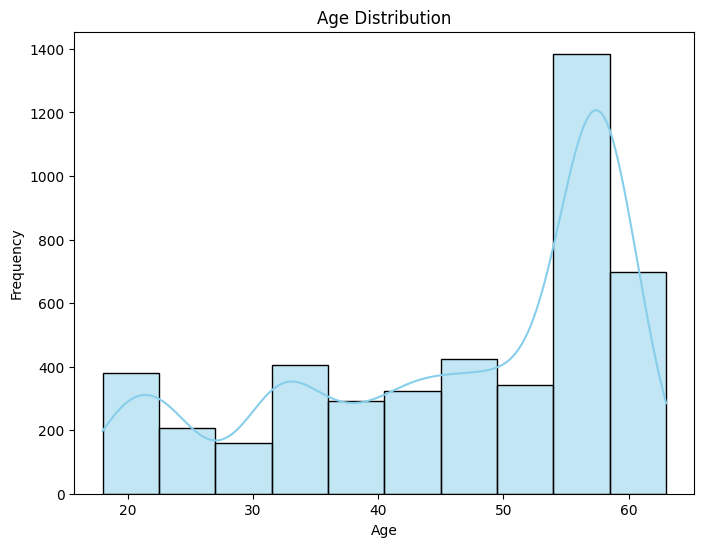


Frequency of Current Occupation:
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64


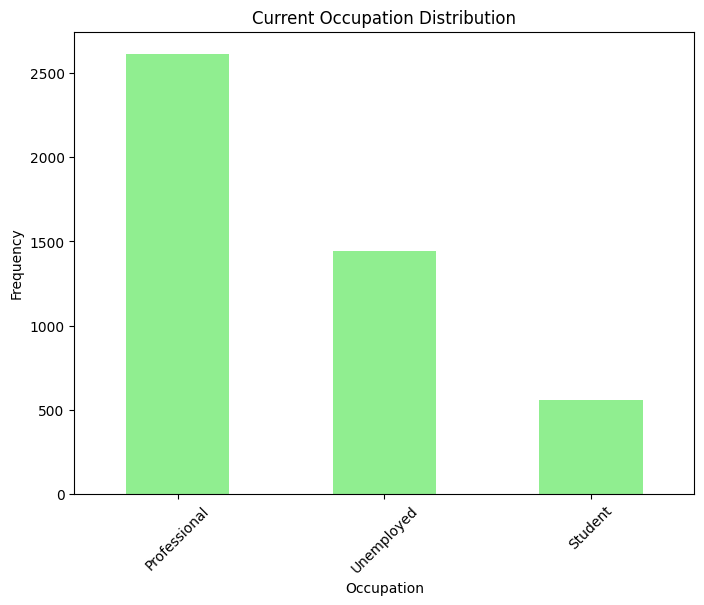


Frequency of First Interaction:
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64


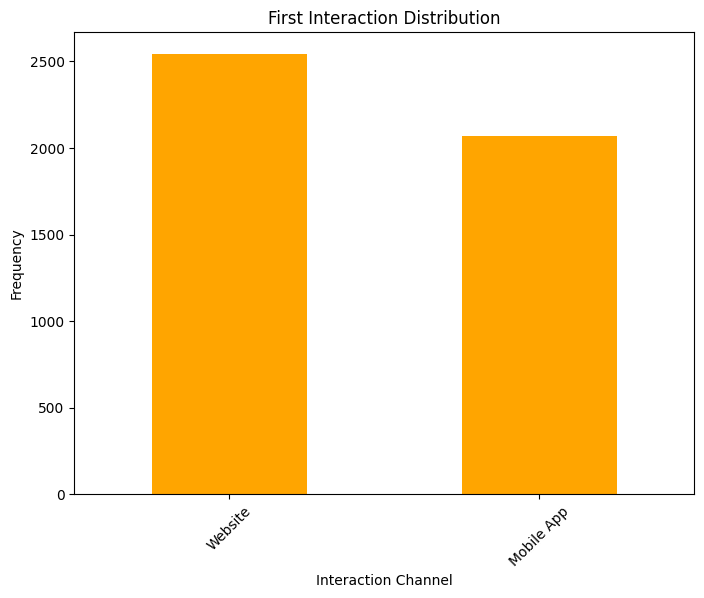


Frequency of Profile Completed:
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64


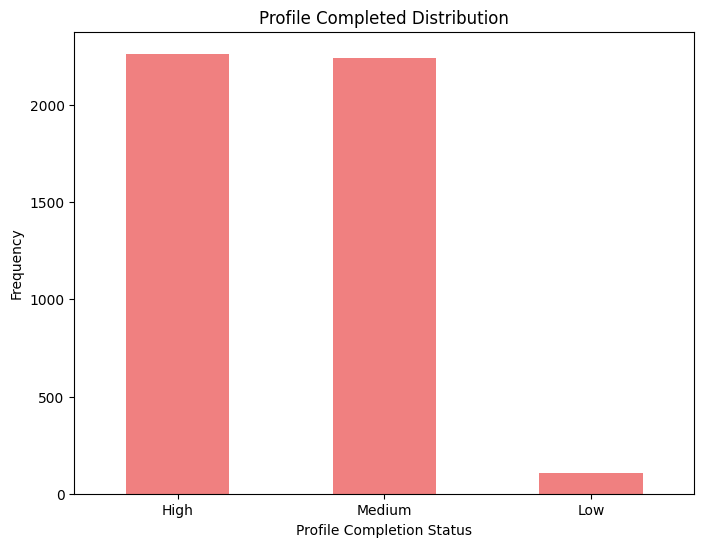


Descriptive Statistics for Website Visits, Time Spent on Website, Page Views per Visit:
       website_visits  time_spent_on_website  page_views_per_visit
count     4612.000000            4612.000000           4612.000000
mean         3.566782             724.011275              3.026126
std          2.829134             743.828683              1.968125
min          0.000000               0.000000              0.000000
25%          2.000000             148.750000              2.077750
50%          3.000000             376.000000              2.792000
75%          5.000000            1336.750000              3.756250
max         30.000000            2537.000000             18.434000


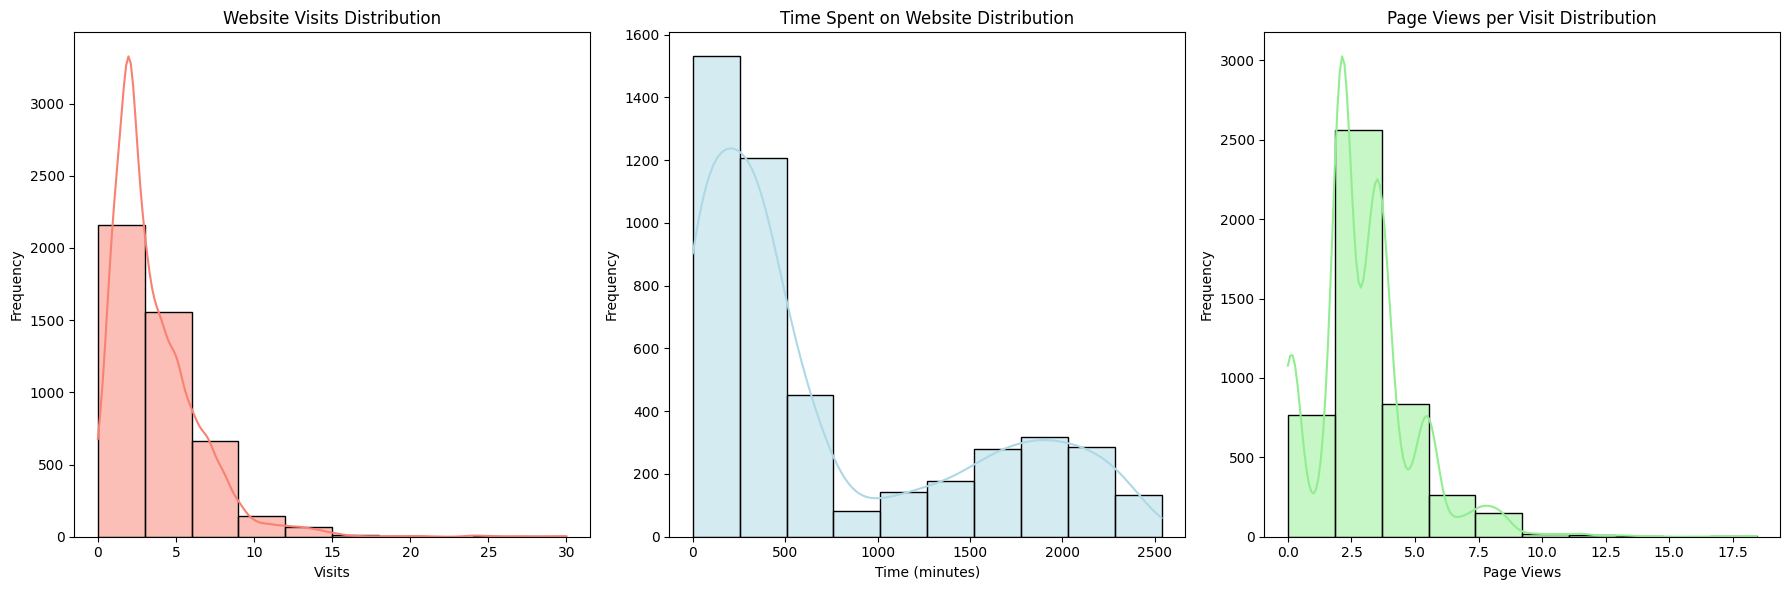


Frequency of Last Activity:
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64


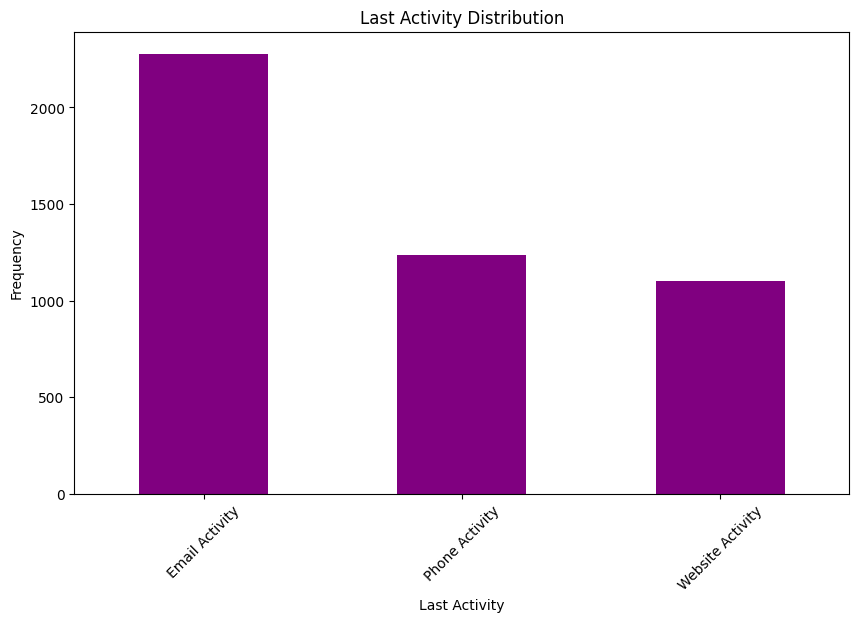


Frequency of Print Media, Digital Media, Educational Channels, and Referral:
     print_media_type1  print_media_type2  digital_media  \
No                4115               4379           4085   
Yes                497                233            527   

     educational_channels  referral  
No                   3907      4519  
Yes                   705        93  


<Figure size 1200x800 with 0 Axes>

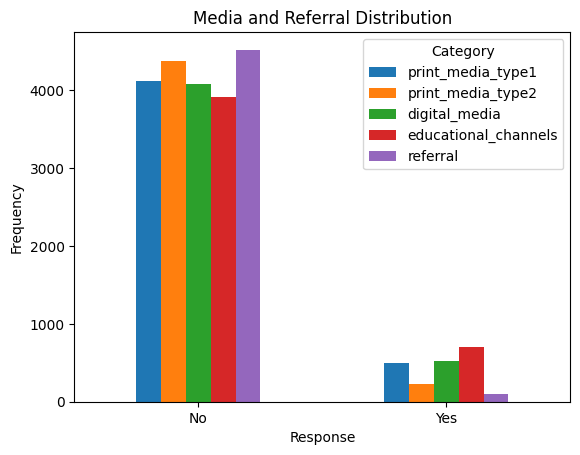


Frequency of Status:
0    3235
1    1377
Name: status, dtype: int64


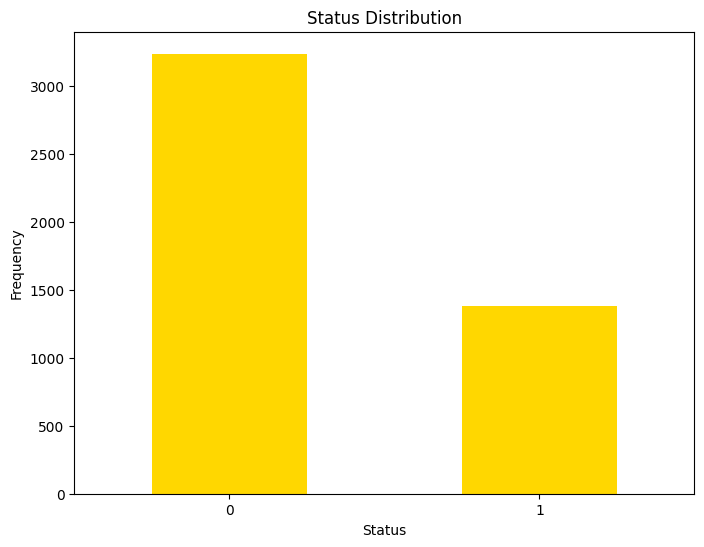

In [ ]:
# Performing univariate analysis

# Age
age_stats = df['age'].describe()
print("Descriptive Statistics for Age:")
print(age_stats)

# Visualize Age distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Current Occupation
occupation_counts = df['current_occupation'].value_counts()
print("\nFrequency of Current Occupation:")
print(occupation_counts)

# Visualize Current Occupation distribution using a bar chart
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', color='lightgreen')
plt.title('Current Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# First Interaction
interaction_counts = df['first_interaction'].value_counts()
print("\nFrequency of First Interaction:")
print(interaction_counts)

# Visualize First Interaction distribution using a bar chart
plt.figure(figsize=(8, 6))
interaction_counts.plot(kind='bar', color='orange')
plt.title('First Interaction Distribution')
plt.xlabel('Interaction Channel')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Profile Completed
profile_completed_counts = df['profile_completed'].value_counts()
print("\nFrequency of Profile Completed:")
print(profile_completed_counts)

# Visualize Profile Completed distribution using a bar chart
plt.figure(figsize=(8, 6))
profile_completed_counts.plot(kind='bar', color='lightcoral')
plt.title('Profile Completed Distribution')
plt.xlabel('Profile Completion Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Website Visits, Time Spent on Website, Page Views per Visit
website_stats = df[['website_visits', 'time_spent_on_website', 'page_views_per_visit']].describe()
print("\nDescriptive Statistics for Website Visits, Time Spent on Website, Page Views per Visit:")
print(website_stats)

# Visualize Website Visits distribution using histograms
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['website_visits'], bins=10, kde=True, color='salmon')
plt.title('Website Visits Distribution')
plt.xlabel('Visits')
plt.ylabel('Frequency')

# Visualize Time Spent on Website distribution using histograms
plt.subplot(1, 3, 2)
sns.histplot(df['time_spent_on_website'], bins=10, kde=True, color='lightblue')
plt.title('Time Spent on Website Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

# Visualize Page Views per Visit distribution using histograms
plt.subplot(1, 3, 3)
sns.histplot(df['page_views_per_visit'], bins=10, kde=True, color='lightgreen')
plt.title('Page Views per Visit Distribution')
plt.xlabel('Page Views')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Last Activity
last_activity_counts = df['last_activity'].value_counts()
print("\nFrequency of Last Activity:")
print(last_activity_counts)

# Visualize Last Activity distribution using a bar chart
plt.figure(figsize=(10, 6))
last_activity_counts.plot(kind='bar', color='purple')
plt.title('Last Activity Distribution')
plt.xlabel('Last Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Print Media Type 1, Print Media Type 2, Digital Media, Educational Channels, Referral
media_counts = df[['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']].apply(pd.Series.value_counts)
print("\nFrequency of Print Media, Digital Media, Educational Channels, and Referral:")
print(media_counts)

# Visualize Print Media, Digital Media, Educational Channels, and Referral distributions using bar charts
plt.figure(figsize=(12, 8))
media_counts.plot(kind='bar')
plt.title('Media and Referral Distribution')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

# Status
status_counts = df['status'].value_counts()
print("\nFrequency of Status:")
print(status_counts)

# Visualize Status distribution using a bar chart
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='gold')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


ID is a unique identifier for each record, therefore has no meaningful part to play in the dataset other than ensuring data sanity

**General observations around the various attributes**

All attributes had no significant outliers, except the Time Spent on Website attribute, where some individuals are spending significantly more time than the median or mean

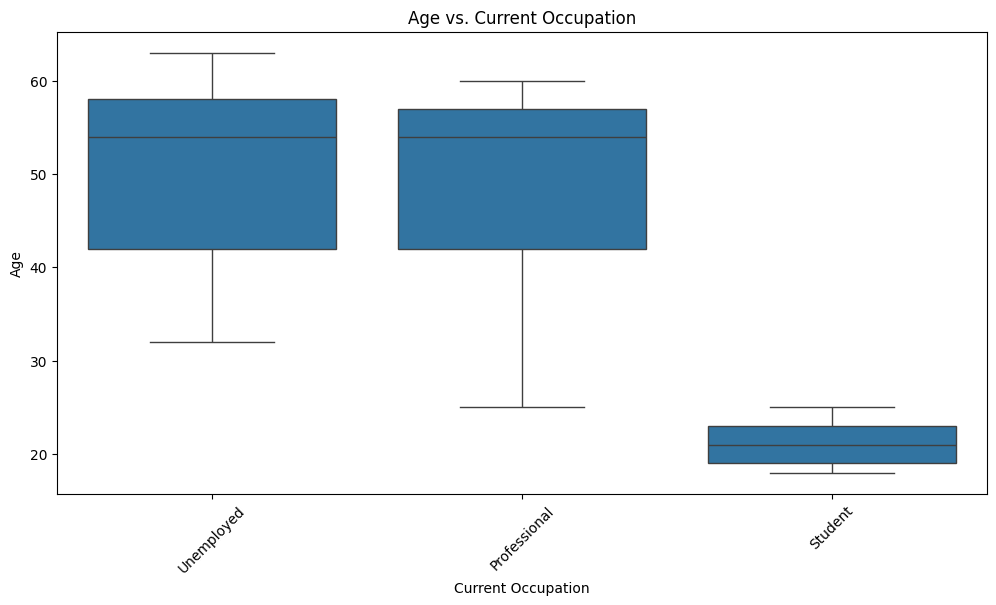

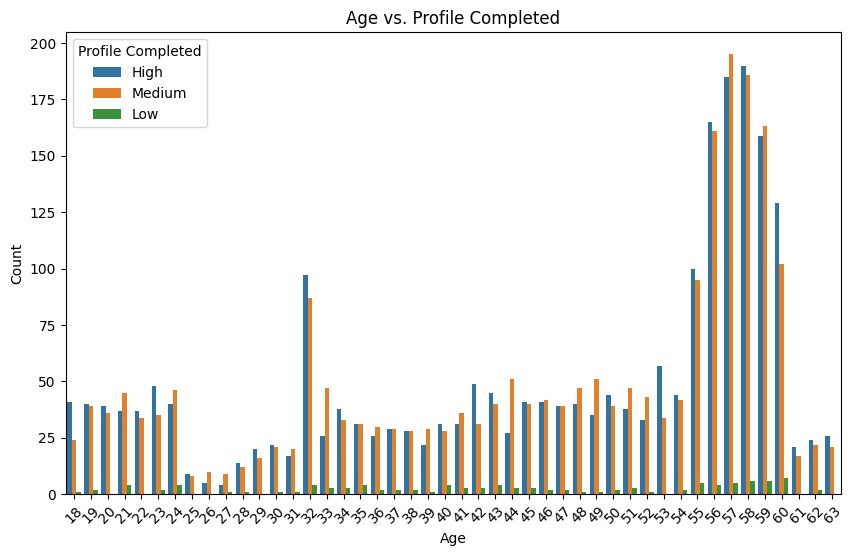

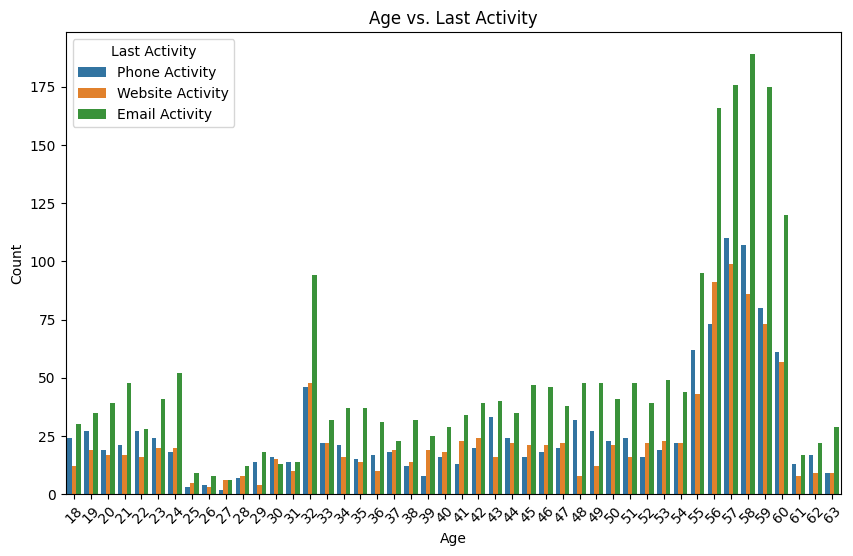

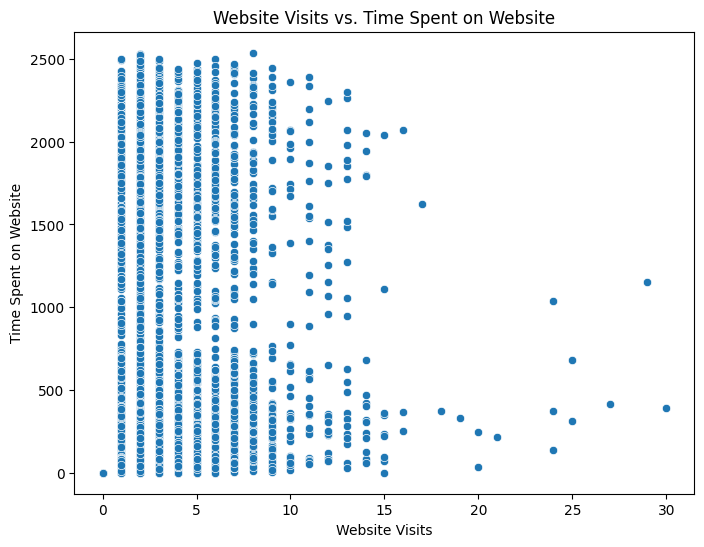

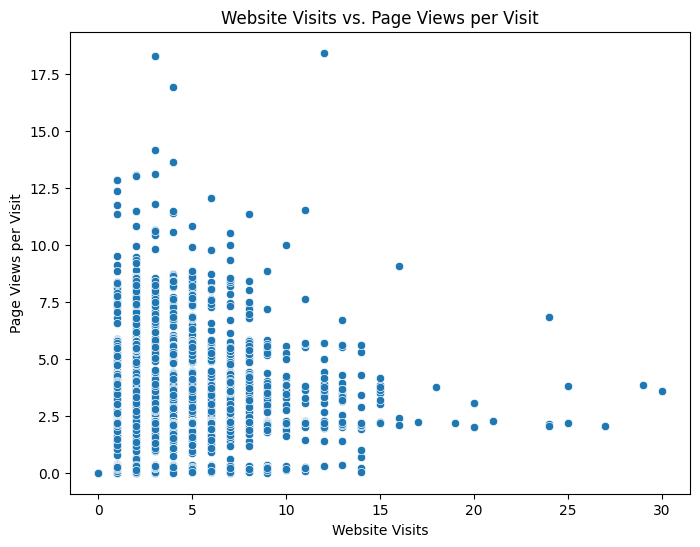

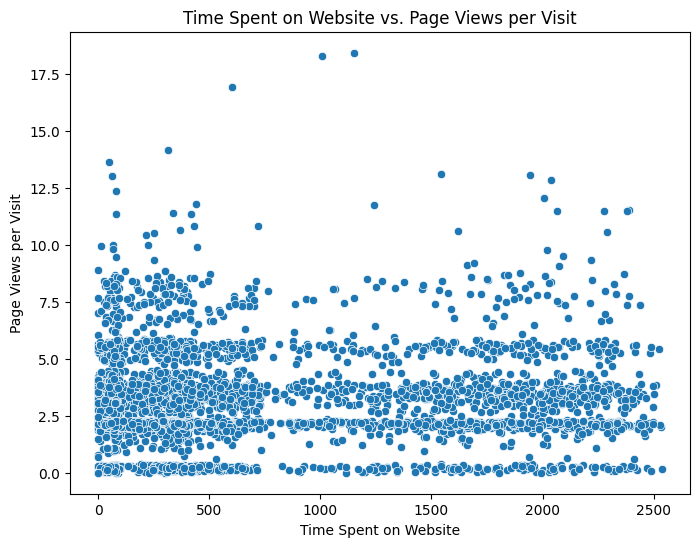

<Figure size 1000x600 with 0 Axes>

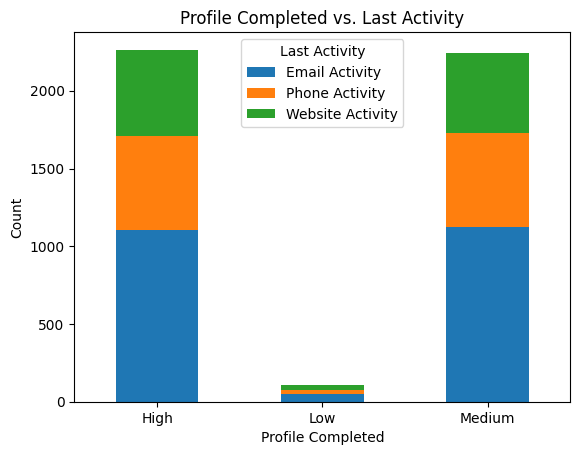

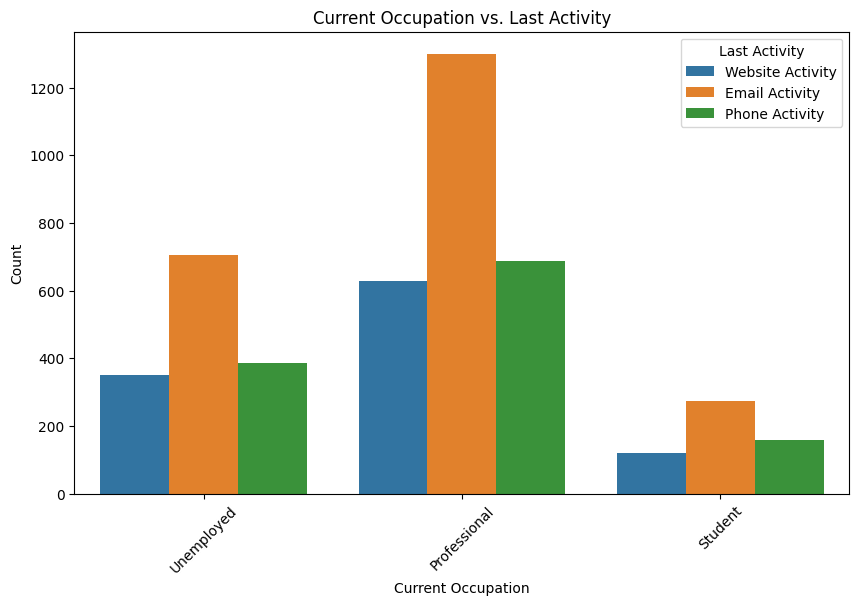

<Figure size 800x600 with 0 Axes>

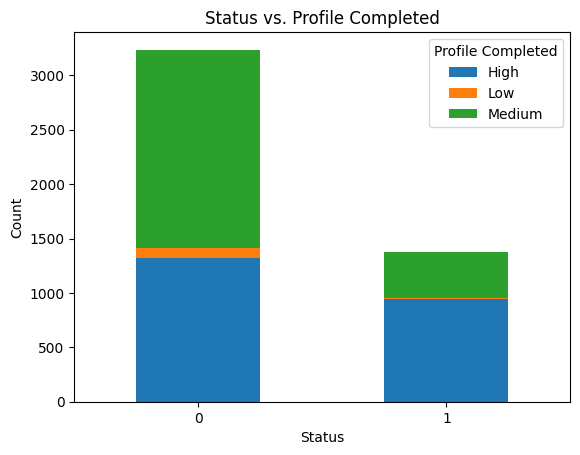

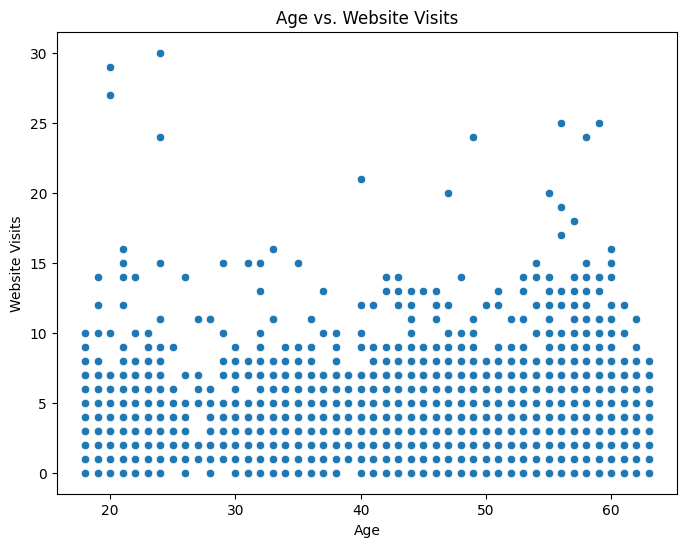

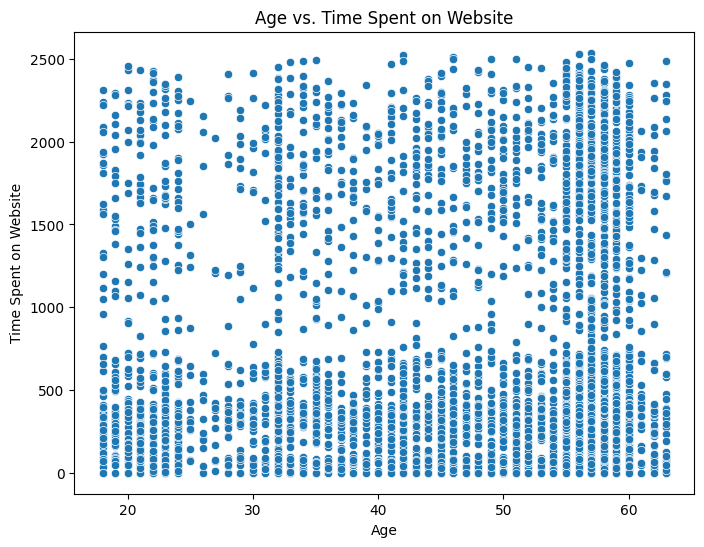

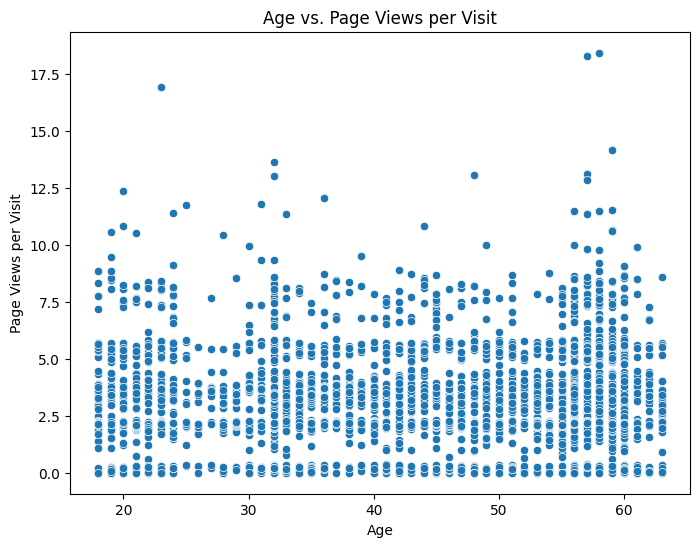

<Figure size 1000x600 with 0 Axes>

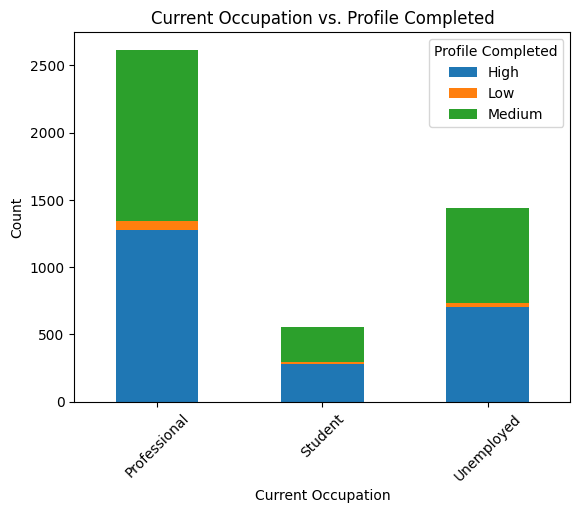

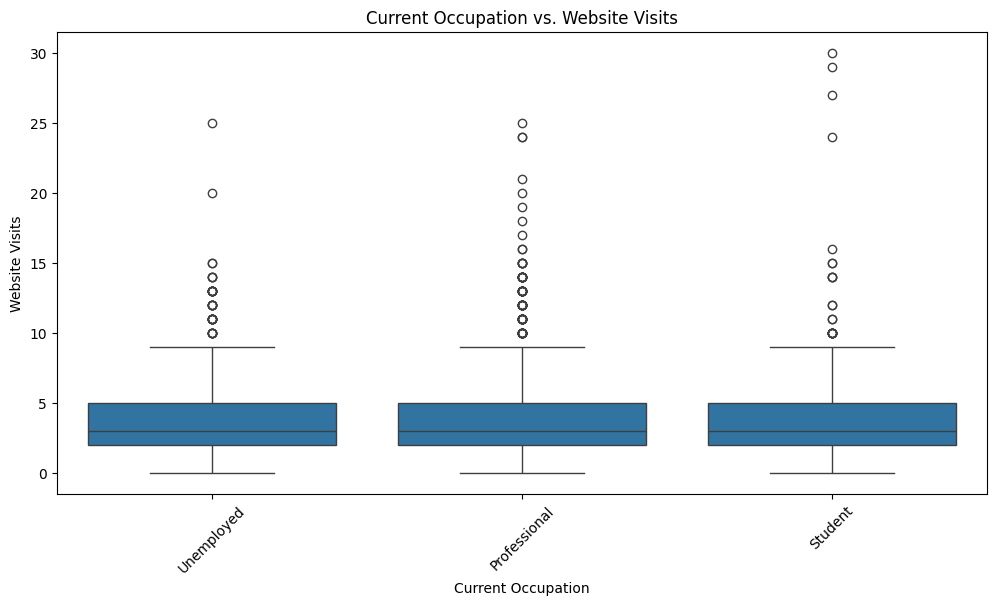

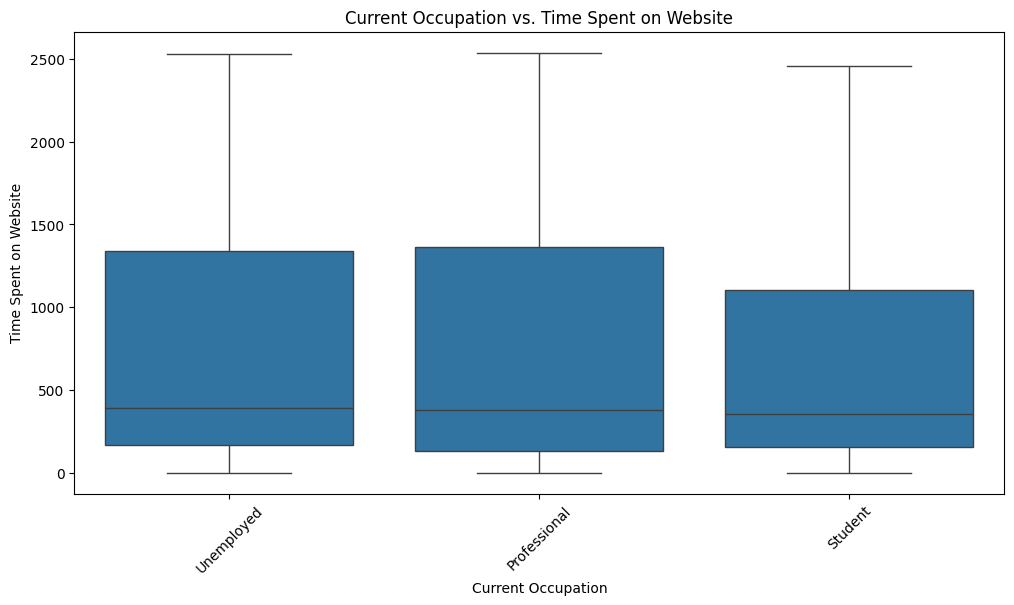

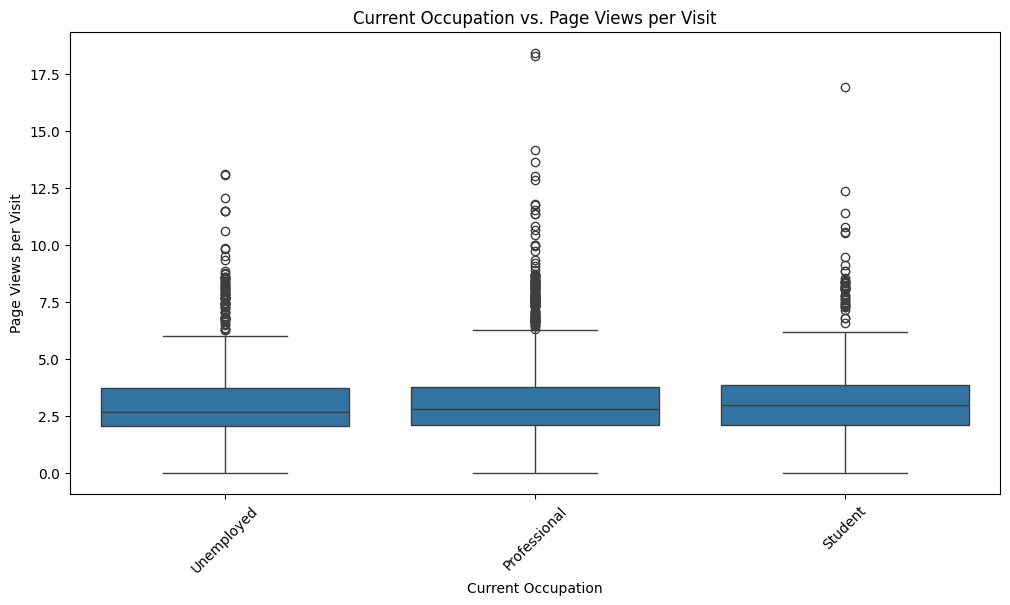

<Figure size 1000x600 with 0 Axes>

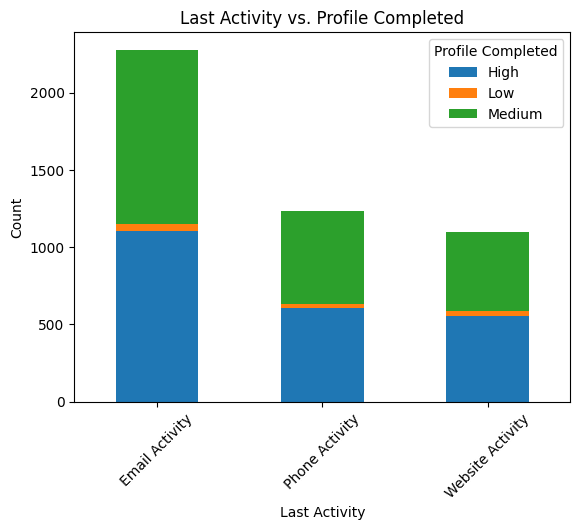

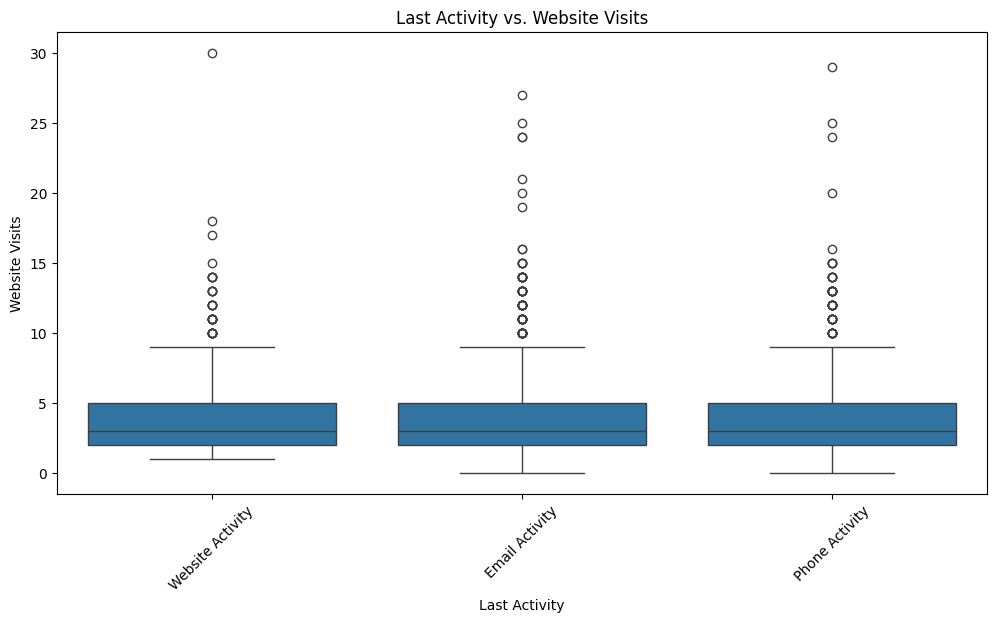

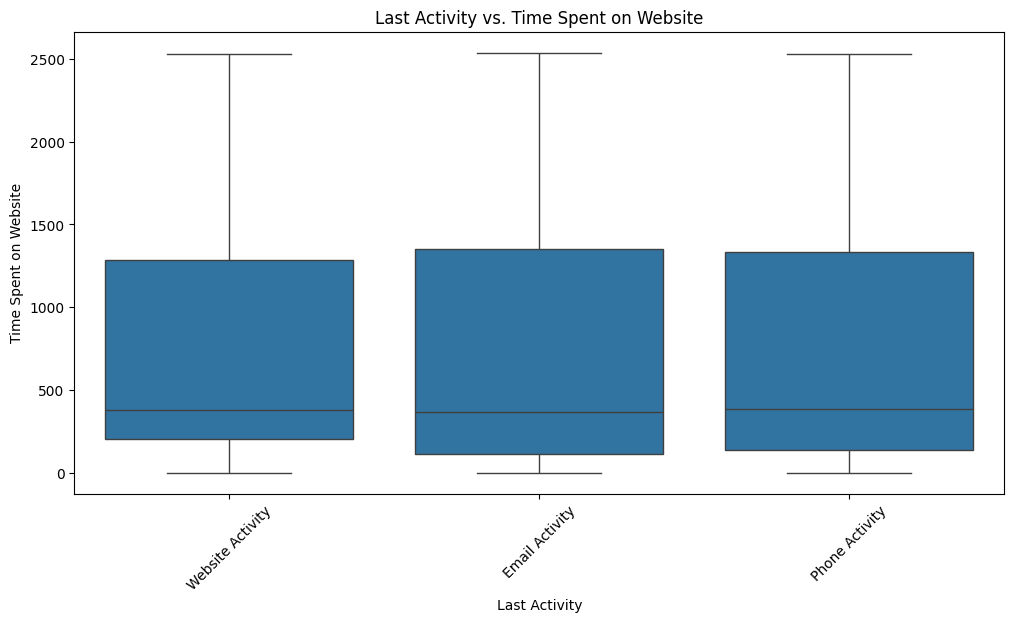

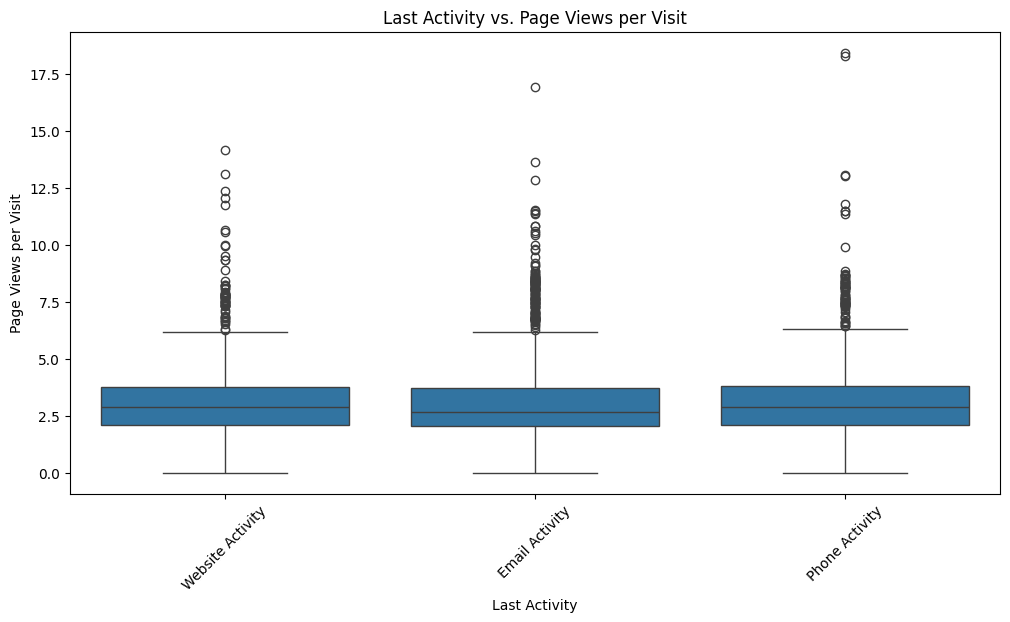

In [ ]:
# Performing bivariate analysis

# 1. Age vs. Current Occupation (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_occupation', y='age', data=df)
plt.title('Age vs. Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# 2. Age vs. Profile Completed (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='profile_completed', data=df)
plt.title('Age vs. Profile Completed')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Profile Completed')
plt.xticks(rotation=45)
plt.show()

# 3. Age vs. Last Activity (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='last_activity', data=df)
plt.title('Age vs. Last Activity')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Last Activity')
plt.xticks(rotation=45)
plt.show()

# 4. Website Visits vs. Time Spent on Website (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='website_visits', y='time_spent_on_website', data=df)
plt.title('Website Visits vs. Time Spent on Website')
plt.xlabel('Website Visits')
plt.ylabel('Time Spent on Website')
plt.show()

# 5. Website Visits vs. Page Views per Visit (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='website_visits', y='page_views_per_visit', data=df)
plt.title('Website Visits vs. Page Views per Visit')
plt.xlabel('Website Visits')
plt.ylabel('Page Views per Visit')
plt.show()

# 6. Time Spent on Website vs. Page Views per Visit (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='time_spent_on_website', y='page_views_per_visit', data=df)
plt.title('Time Spent on Website vs. Page Views per Visit')
plt.xlabel('Time Spent on Website')
plt.ylabel('Page Views per Visit')
plt.show()

# 7. Profile Completed vs. Last Activity (Stacked bar chart)
plt.figure(figsize=(10, 6))
pd.crosstab(df['profile_completed'], df['last_activity']).plot(kind='bar', stacked=True)
plt.title('Profile Completed vs. Last Activity')
plt.xlabel('Profile Completed')
plt.ylabel('Count')
plt.legend(title='Last Activity')
plt.xticks(rotation=0)
plt.show()

# 8. Current Occupation vs. Last Activity (Clustered bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='last_activity', data=df)
plt.title('Current Occupation vs. Last Activity')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.legend(title='Last Activity')
plt.xticks(rotation=45)
plt.show()

# 9. Status vs. Various Variables (Stacked bar charts or other appropriate visualizations)
# Example: Status vs. Profile Completed
plt.figure(figsize=(8, 6))
pd.crosstab(df['status'], df['profile_completed']).plot(kind='bar', stacked=True)
plt.title('Status vs. Profile Completed')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Profile Completed')
plt.xticks(rotation=0)
plt.show()

# 10. Age vs. Website Visits (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='website_visits', data=df)
plt.title('Age vs. Website Visits')
plt.xlabel('Age')
plt.ylabel('Website Visits')
plt.show()

# 11. Age vs. Time Spent on Website (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='time_spent_on_website', data=df)
plt.title('Age vs. Time Spent on Website')
plt.xlabel('Age')
plt.ylabel('Time Spent on Website')
plt.show()

# 12. Age vs. Page Views per Visit (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='page_views_per_visit', data=df)
plt.title('Age vs. Page Views per Visit')
plt.xlabel('Age')
plt.ylabel('Page Views per Visit')
plt.show()

# 13. Current Occupation vs. Profile Completed (Stacked bar chart)
plt.figure(figsize=(10, 6))
pd.crosstab(df['current_occupation'], df['profile_completed']).plot(kind='bar', stacked=True)
plt.title('Current Occupation vs. Profile Completed')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.legend(title='Profile Completed')
plt.xticks(rotation=45)
plt.show()

# 14. Current Occupation vs. Website Visits (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_occupation', y='website_visits', data=df)
plt.title('Current Occupation vs. Website Visits')
plt.xlabel('Current Occupation')
plt.ylabel('Website Visits')
plt.xticks(rotation=45)
plt.show()

# 15. Current Occupation vs. Time Spent on Website (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_occupation', y='time_spent_on_website', data=df)
plt.title('Current Occupation vs. Time Spent on Website')
plt.xlabel('Current Occupation')
plt.ylabel('Time Spent on Website')
plt.xticks(rotation=45)
plt.show()

# 16. Current Occupation vs. Page Views per Visit (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_occupation', y='page_views_per_visit', data=df)
plt.title('Current Occupation vs. Page Views per Visit')
plt.xlabel('Current Occupation')
plt.ylabel('Page Views per Visit')
plt.xticks(rotation=45)
plt.show()

# 17. Last Activity vs. Profile Completed (Stacked bar chart)
plt.figure(figsize=(10, 6))
pd.crosstab(df['last_activity'], df['profile_completed']).plot(kind='bar', stacked=True)
plt.title('Last Activity vs. Profile Completed')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.legend(title='Profile Completed')
plt.xticks(rotation=45)
plt.show()

# 18. Last Activity vs. Website Visits (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='last_activity', y='website_visits', data=df)
plt.title('Last Activity vs. Website Visits')
plt.xlabel('Last Activity')
plt.ylabel('Website Visits')
plt.xticks(rotation=45)
plt.show()

# 19. Last Activity vs. Time Spent on Website (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='last_activity', y='time_spent_on_website', data=df)
plt.title('Last Activity vs. Time Spent on Website')
plt.xlabel('Last Activity')
plt.ylabel('Time Spent on Website')
plt.xticks(rotation=45)
plt.show()

# 20. Last Activity vs. Page Views per Visit (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='last_activity', y='page_views_per_visit', data=df)
plt.title('Last Activity vs. Page Views per Visit')
plt.xlabel('Last Activity')
plt.ylabel('Page Views per Visit')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Data pre-processing

# Convert categorical variables to numerical using Label Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split data into features and target variable
X = df.drop(columns=['status'])  # Features
y = df['status']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Observations:**

In the data exploratory section, outlier detection, checking for missing values and deleting the ID column had already been performed.

Data manipulation done on column converstion and data splitting


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# Data exploration after manipulation

# Inspect the DataFrame
print(df.head())

# Check column names
print(df.columns)

# Summary statistics
print(df.describe())

# Data types
print(df.dtypes)

# Missing values
print(df.isnull().sum())

# Explore categorical values
for column in df.select_dtypes(include='object').columns:
    print(column)
    print(df[column].value_counts())

# Data correlation
print(df.corr)

   age  current_occupation  first_interaction  profile_completed  \
0   57                   2                  1                  0   
1   56                   0                  0                  2   
2   52                   0                  1                  2   
3   53                   2                  1                  0   
4   23                   1                  1                  0   

   website_visits  time_spent_on_website  page_views_per_visit  last_activity  \
0               7                   1639                 1.861              2   
1               2                     83                 0.320              2   
2               3                    330                 0.074              2   
3               4                    464                 2.057              2   
4               4                    600                16.914              0   

   print_media_type1  print_media_type2  digital_media  educational_channels  \
0                  1    

## Building a Decision Tree model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8255687973997833
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       649
           1       0.72      0.68      0.70       274

    accuracy                           0.83       923
   macro avg       0.79      0.78      0.79       923
weighted avg       0.82      0.83      0.82       923



## Do we need to prune the tree?

In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define a range of values for ccp_alpha
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]}

# Perform grid search using cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best value of ccp_alpha
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
print("Best ccp_alpha:", best_ccp_alpha)

# Train the decision tree with the best ccp_alpha
pruned_clf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=42)
pruned_clf.fit(X_train_scaled, y_train)

# Evaluate the pruned model
y_pred_pruned = pruned_clf.predict(X_test_scaled)
print("Accuracy after pruning:", accuracy_score(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))


Best ccp_alpha: 0.01
Accuracy after pruning: 0.8299024918743229
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       649
           1       0.70      0.76      0.73       274

    accuracy                           0.83       923
   macro avg       0.79      0.81      0.80       923
weighted avg       0.84      0.83      0.83       923



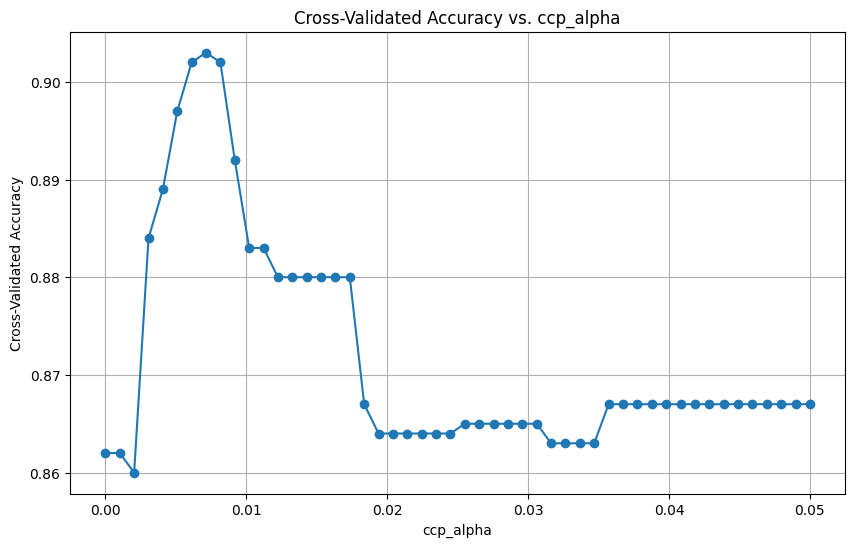

In [33]:
# Import libraries
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Generate synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Define a range of ccp_alpha values to evaluate
alphas = np.linspace(0, 0.05, 50)

# Initialize lists to store cross-validated accuracies
accuracies = []

# Iterate over different values of ccp_alpha
for alpha in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    scores = cross_val_score(clf, X, y, cv=5)
    accuracies.append(scores.mean())

# Plot cross-validated accuracy against ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, accuracies, marker='o')
plt.title('Cross-Validated Accuracy vs. ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()


**Observations**

From the above plot and post pruning results, one can deduce that pruning improves the accuracy of the model.

Before pruning, the accuracy was 0.825, while after pruning, accuracy is 0.829. The margin is small and not so significant, thus prunning is not needed

## Building a Random Forest model

In [34]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Build Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate Model
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.82      0.69      0.75       274

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



## Do we need to prune the tree?

In [35]:
# Hyperparametizing using tree depth to explore if pruning is needed

# Define the range of tree depths to explore
param_grid = {'max_depth': range(1, 21)}

# Create a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best tree depth
best_depth = grid_search.best_params_['max_depth']
print("Best Tree Depth:", best_depth)

# Evaluate the model on the test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

Best Tree Depth: 6
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       649
           1       0.82      0.76      0.79       274

    accuracy                           0.88       923
   macro avg       0.86      0.84      0.85       923
weighted avg       0.88      0.88      0.88       923



**Observations:**

From the above sample of hyperparametizing using the tree depth, we can see the accuracy has improved by 0.2. This is a small change and therefore, pruning is not that necessary.

## Actionable Insights and Recommendations

* Identifying High-Quality Leads: The ML models built, such as decision trees and random forests, can be used to predict which leads are more likely to convert to paid customers. By analyzing the features driving lead conversion, ExtraaLearn can prioritize leads with higher conversion probabilities, thus optimizing resource allocation and improving conversion rates.

* Key Factors Driving Conversion: Analyzing the feature importance from the ML models can provide insights into the factors that influence lead conversion. These factors may include demographics, engagement with marketing materials, interactions on the website or app, and communication channels used (e.g., social media, email). Understanding these key drivers can help ExtraaLearn tailor their marketing strategies and communication approaches to better engage potential customers.

* Targeted Marketing and Communication: Based on the identified profile of leads likely to convert, ExtraaLearn can develop targeted marketing campaigns and personalized communication strategies. This may involve customizing messaging, offers, and content to resonate with the preferences and characteristics of high-converting leads, thus increasing the likelihood of conversion.

* Continuous Model Evaluation and Refinement: It's important for ExtraaLearn to continuously evaluate the performance of the ML models and refine them over time. This can involve monitoring model accuracy, precision, recall, and F1-score, as well as conducting A/B testing for different marketing strategies. By iterating on the models and incorporating new data and insights, ExtraaLearn can improve the accuracy and effectiveness of their lead conversion predictions.

* Investment in Digital Marketing and Lead Nurturing: Given the rapid growth and competition in the EdTech industry, ExtraaLearn should continue investing in digital marketing resources and lead nurturing efforts. This includes maintaining a strong online presence, leveraging social media and other online platforms for lead generation, and providing informative and engaging content to attract and retain leads.

* Focus on Personalized Learning Experience: Highlighting the benefits of personalized learning experience offered by ExtraaLearn can be a key selling point in converting leads to paid customers. Emphasizing features such as tailored learning paths, interactive courses, and real-time feedback can differentiate ExtraaLearn from competitors and appeal to the preferences of modern learners.